In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor

In [196]:
abo_path = 'D:/Users/masoodw/ML_FINANCE/asigmo/github/asigmo/data/boston_housing/Real.xlsx'
p_df_raw = pd.read_excel(abo_path)

p_df_raw['X1 transaction date'] = p_df_raw['X1 transaction date'].astype(str)
year = p_df_raw['X1 transaction date'].str[:4]
month = p_df_raw['X1 transaction date'].str[5:6]
p_df_raw['date'] = year + month
p_df_raw = p_df_raw.sort_values(['date'])

In [197]:
p_df_raw.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,date
293,294,2012.6666667,12.6,383.2805,7,24.96735,121.54464,42.5,20126
134,135,2012.6666667,33.4,186.9686,6,24.96604,121.54211,42.2,20126
383,384,2012.6666667,29.1,506.1144,4,24.97845,121.53889,40.3,20126
203,204,2012.6666667,15.6,289.3248,5,24.98203,121.54348,46.1,20126
149,150,2012.6666667,34.9,179.4538,8,24.97349,121.54245,39.7,20126


In [198]:
p_df_raw.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
date                                      0
dtype: int64

In [199]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [201]:
p_df_raw = clean_dataset(p_df_raw)
df_X = p_df_raw.drop(['No', 'X1 transaction date', 'Y house price of unit area'], axis=1)
df_y = p_df_raw['Y house price of unit area']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y)

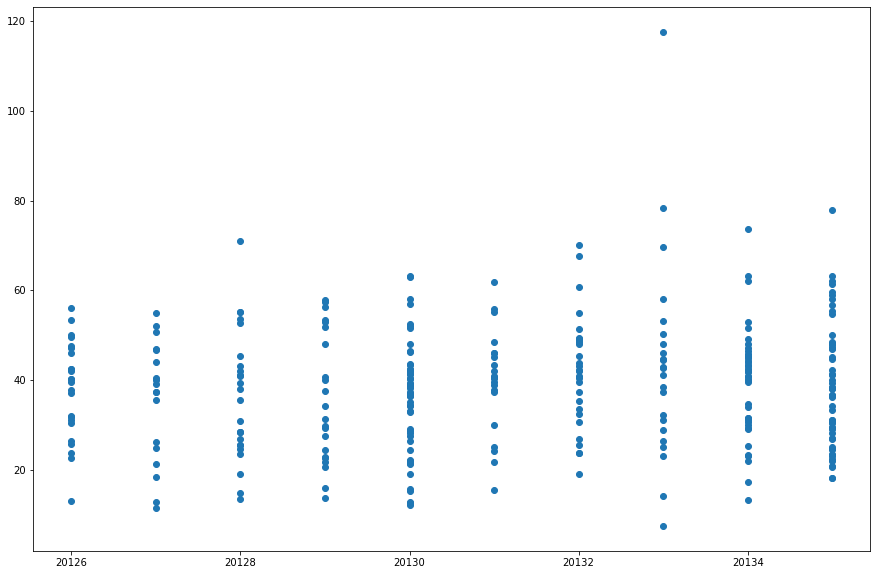

In [203]:
fig = plt.figure(figsize=(15, 10))
plt.scatter(X_train['date'], y_train)

### Just taking the mean

In [205]:
y_pred = p_df_raw.groupby(['date'])['Y house price of unit area'].mean()

In [215]:
y_pred.values

array([38.54333333, 35.58148148, 35.68387097, 35.55789474, 36.92297297,
       38.304     , 41.29375   , 41.56206897, 38.45344828, 38.60714286])

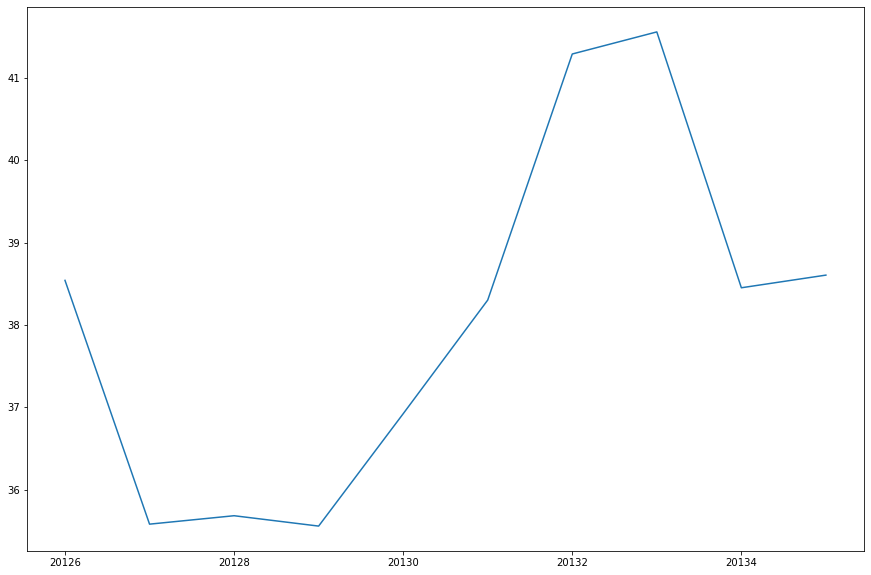

In [216]:
fig = plt.figure(figsize=(15, 10))
plt.plot(y_pred.index, y_pred.values)